# Data Understand for Online Retail 


* # Customer Segmentation with RFM in 6 Steps

 1. Business Problem
 2. Data Understanding
 3. Data Preparation
 4. Calculating RFM Metrics
 5. Calculating RFM Scores
 6. Naming & Analysing RFM Segments

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dt
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_ = pd.read_excel("../5_Recap/online_retail_II.xlsx")

In [140]:
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [141]:
def data_understand(dataframe):
    print("*************************** Data shape ***************************")
    print(dataframe.shape)
    print("*************************** Are there any missing values? ***************************")
    print(dataframe.isnull().sum())
    print("*************************** Data unique values ***************************")
    print(dataframe.describe())
    print("*************************** Description number of unique values ***************************")
    print(dataframe["Description"].nunique())
    print("*************************** Description value counts values first 10 columns ***************************")
    print(dataframe["Description"].value_counts().head(10))
    print("*************************** Description value counts values last 10 columns ***************************")
    print(dataframe["Description"].value_counts().tail(10))
    print("*************************** Invoice unique values ***************************")
    print(dataframe["Invoice"].nunique())
    print("*************************** Invoice value counts values ***************************")
    print(dataframe["Invoice"].value_counts().head(10))
data_understand(df)

*************************** Data shape ***************************
(525461, 8)
*************************** Are there any missing values? ***************************
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
*************************** Data unique values ***************************
            Quantity          Price    Customer ID
count  525461.000000  525461.000000  417534.000000
mean       10.337667       4.688834   15360.645478
std       107.424110     146.126914    1680.811316
min     -9600.000000  -53594.360000   12346.000000
25%         1.000000       1.250000   13983.000000
50%         3.000000       2.100000   15311.000000
75%        10.000000       4.210000   16799.000000
max     19152.000000   25111.090000   18287.000000
*************************** Description number of unique values ***************************
4681
***************

In [142]:
df.groupby(["Description"]).agg({"Quantity":"sum"}).head(5)

,Quantity
Description,
21494,-720
22467,-2
22719,2
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,690


In [143]:
df.loc[df["Invoice"] ==537434].head()
df.loc[df["Description"] ==21494]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
516208,537434,20685,DOORMAT RED RETROSPOT,1,2010-12-06 16:57:00,14.43,NaN,United Kingdom
516209,537434,20699,MOUSEY LONG LEGS SOFT TOY,1,2010-12-06 16:57:00,5.06,NaN,United Kingdom
516210,537434,20713,JUMBO BAG OWLS,1,2010-12-06 16:57:00,4.21,NaN,United Kingdom
516211,537434,20719,WOODLAND CHARLOTTE BAG,3,2010-12-06 16:57:00,1.66,NaN,United Kingdom
516212,537434,20725,LUNCH BAG RED RETROSPOT,4,2010-12-06 16:57:00,4.21,NaN,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
6911,490007,84347,21494,-720,2009-12-03 12:09:00,0.0,NaN,United Kingdom


In [144]:
# In Invoice column, it contains "C". "C" means cancel invoice the number of 10206 
df.loc[df["Invoice"].str.contains("C", na=False)] # !!carreful!! if you dont put na=false, you encounter error

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [145]:
# BURADA KARIŞIK İŞLER DÖNDÜ :))
df["Quantity"] = df["Quantity"].astype(dtype="string")
df.info()
df.loc[df["Quantity"].str.startswith("-", na=False)] # 12326 Quantity equals to negative values
df["Quantity"] = df["Quantity"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  string        
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4), string(1)
memory usage: 32.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [146]:
# Price multiply by Quantity = TotalPrice
df["TotalPrice"] = df["Price"] * df["Quantity"]

In [147]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [148]:
df.sort_values("Price",ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom,-25111.09
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom,25111.09
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom,-18910.69
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,-13541.33
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33


In [149]:
df.Country.value_counts().head(10)

United Kingdom     485852
EIRE                 9670
Germany              8129
France               5772
Netherlands          2769
Spain                1278
Switzerland          1187
Portugal             1101
Belgium              1054
Channel Islands       906
Name: Country, dtype: int64

<AxesSubplot:xlabel='Country', ylabel='TotalPrice'>

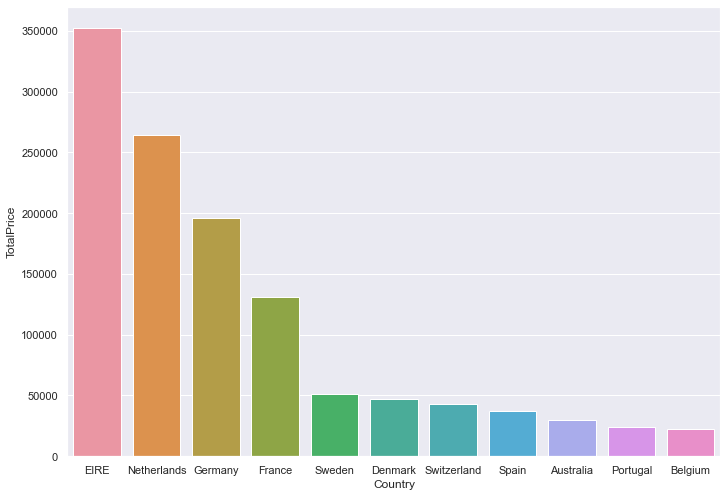

In [150]:
df_top10 = df.groupby("Country").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False)[1:12].reset_index() # without USA 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = "Country", y="TotalPrice", data=df_top10)

<AxesSubplot:xlabel='index', ylabel='Country'>

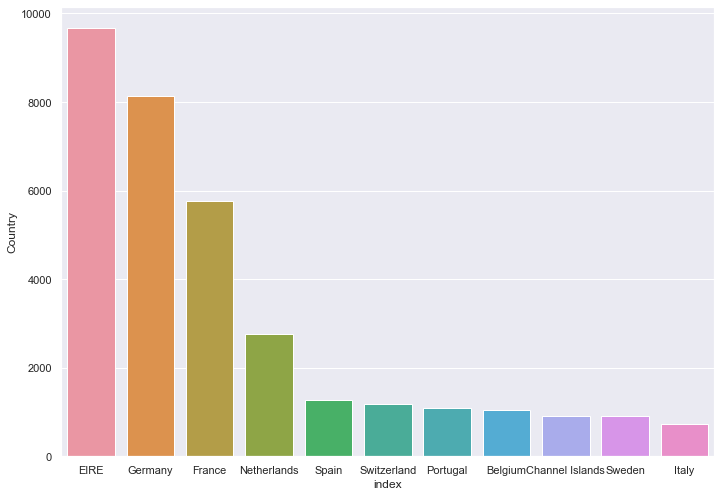

In [151]:
df_country = df["Country"].value_counts().reset_index()[1:12]
sns.barplot(x="index", y="Country", data=df_country)

# Data Preparation

In [152]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
TotalPrice          0
dtype: int64

In [153]:
def data_prep(dataframe):
    dataframe.dropna(inplace=True)
    return dataframe
df = data_prep(df)

In [154]:
df.shape

(417534, 9)

In [155]:
(525461 - 417534) / 525461

0.20539488182757618

In [156]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T # Data has several outliers value

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,417534.0,12.758815,101.220424,-9360.00,-2.00,1.00,1.00,2.00,4.00,12.00,24.00,36.0,144.00,19152.00
Price,417534.0,3.887547,71.131797,0.00,0.29,0.42,0.65,1.25,1.95,3.75,6.75,8.5,14.95,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,12435.00,12725.00,13042.00,13983.00,15311.00,16799.00,17706.00,17913.0,18196.00,18287.00
TotalPrice,417534.0,19.994081,99.915863,-25111.09,-11.25,1.10,1.70,4.25,11.25,19.35,35.40,65.4,196.20,15818.40


# Calculating RFM Metrics
* Recency, Frequency, Monetary
* Today's date - Last purchase

In [157]:
df["Customer ID"] = df["Customer ID"].astype("int64") # Customer id format change to int64
df.sort_values("Customer ID", inplace=True)
df = df.reset_index(drop=True)

In [158]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,513774,48185,DOORMAT FAIRY CAKE,1,2010-06-28 13:53:00,7.49,12346,United Kingdom,7.49
1,499763,15056P,EDWARDIAN PARASOL PINK,1,2010-03-02 13:08:00,5.95,12346,United Kingdom,5.95
2,513774,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2010-06-28 13:53:00,7.49,12346,United Kingdom,7.49
3,513774,20685,DOORMAT RED SPOT,1,2010-06-28 13:53:00,7.49,12346,United Kingdom,7.49
4,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,22.50


In [159]:
today_date = dt.datetime(2010, 12, 11, 20, 1)
print(today_date)

2010-12-11 20:01:00


In [160]:
df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days})

,InvoiceDate
Customer ID,
12346,68
12347,4
12348,75
12349,44
12351,12
...,...
18283,19
18284,66
18285,297


In [161]:
# df["Recency"] = (today_date - df["InvoiceDate"]).astype('timedelta64[D]') - > Method 1
def create_recency(dataframe):
    dataframe["Recency"] = (today_date - dataframe["InvoiceDate"]).dt.days
    return dataframe
df = create_recency(df)

In [162]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Recency
0,513774,48185,DOORMAT FAIRY CAKE,1,2010-06-28 13:53:00,7.49,12346,United Kingdom,7.49,166
1,499763,15056P,EDWARDIAN PARASOL PINK,1,2010-03-02 13:08:00,5.95,12346,United Kingdom,5.95,284
2,513774,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2010-06-28 13:53:00,7.49,12346,United Kingdom,7.49,166
3,513774,20685,DOORMAT RED SPOT,1,2010-06-28 13:53:00,7.49,12346,United Kingdom,7.49,166
4,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,22.50,341


In [163]:
df_recencyRFM = df.groupby("Customer ID").agg({"Recency":"min"}).reset_index()
df_recencyRFM.head()

,Customer ID,Recency
0,12346,68
1,12347,4
2,12348,75
3,12349,44
4,12351,12


In [164]:
# total geşil ortalamalrına göre cutomerID groupby
df_customer_recencyMin = df.groupby("Customer ID").agg({"Recency":"min"}).sort_values("Recency").astype("int64").reset_index()[0:100]
df_customer_recencyMin

,Customer ID,Recency
0,15192,2
1,12755,2
2,16255,2
3,15329,2
4,15311,2
...,...,...
95,14217,2
96,14766,2
97,13090,2
98,13369,2


In [165]:
# total geiliş ortalamalrına göre cutomerID groupby
df_customer_recencyMean = df.groupby("Customer ID").agg({"Recency":"mean"}).sort_values("Recency").astype("int64").reset_index()[0:40]
df_customer_recencyMean.head()
df_customer_recencyMean.Recency.max()

,Customer ID,Recency
0,13369,2
1,12942,2
2,15211,2
3,18043,3
4,18269,3


9

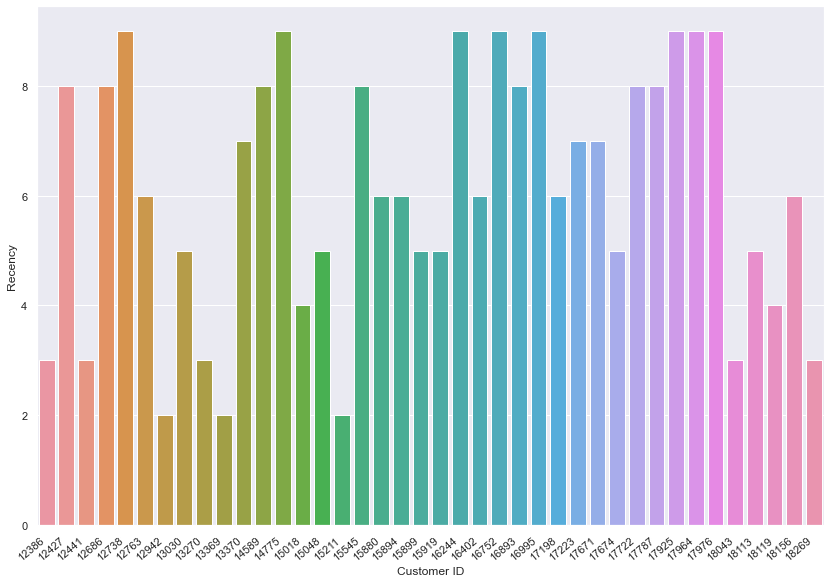

In [166]:
import matplotlib.pyplot as plt
ax = sns.barplot(x= "Customer ID", y= "Recency",
            data = df_customer_recencyMean)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show();

In [167]:
# Calculate Frequency önce Invoice No ve Customer ID duplicate et sonra count yap
df_freqRFM = df[["Invoice", "Customer ID" ]]
df_freqRFM.loc[40:48]

,Invoice,Customer ID
40,C514024,12346
41,C514024,12346
42,C495800,12346
43,513774,12346
44,C525099,12346
45,C525274,12346
46,529924,12347
47,529924,12347
48,529924,12347


In [168]:
df_freqRFM = df_freqRFM.drop_duplicates(subset="Invoice").reset_index(drop=True)
df_freqRFM.head(16)

,Invoice,Customer ID
0,513774,12346
1,499763,12346
2,493410,12346
3,493412,12346
4,495295,12346
5,494450,12346
6,492718,12346
7,492722,12346
8,491725,12346
9,491742,12346


In [169]:
df_freqRFM= df_freqRFM.groupby("Customer ID").count().reset_index()
df_freqRFM.columns = ['Customer ID', 'Frequency']
df_freqRFM.head()

,Customer ID,Frequency
0,12346,15
1,12347,2
2,12348,1
3,12349,4
4,12351,1


In [170]:
df_monetaryRFM = df.groupby("Customer ID").agg({"TotalPrice":"sum"}).reset_index()
df_monetaryRFM.columns = ['Customer ID', 'Monetary']
df_monetaryRFM.head()

,Customer ID,Monetary
0,12346,-64.68
1,12347,1323.32
2,12348,222.16
3,12349,2646.99
4,12351,300.93


In [171]:
df_recencyRFM.head()
df_recencyRFM.shape
df_freqRFM.head()
df_freqRFM.shape
df_monetaryRFM.head()
df_monetaryRFM.shape

,Customer ID,Recency
0,12346,68
1,12347,4
2,12348,75
3,12349,44
4,12351,12


(4383, 2)

,Customer ID,Frequency
0,12346,15
1,12347,2
2,12348,1
3,12349,4
4,12351,1


(4383, 2)

,Customer ID,Monetary
0,12346,-64.68
1,12347,1323.32
2,12348,222.16
3,12349,2646.99
4,12351,300.93


(4383, 2)

In [172]:
df_rf = pd.merge(df_recencyRFM, df_freqRFM, how="left", on=["Customer ID"])
df_rfm = pd.merge(df_rf, df_monetaryRFM, how="left", on=["Customer ID"])

In [173]:
df_rfm =df_rfm.set_index("Customer ID")

In [177]:
df_rfm.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4383 non-null   int64  
 1   Frequency  4383 non-null   int64  
 2   Monetary   4383 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 137.0 KB


# Standard Scaler

In [135]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
st_scaled = st_scaler.fit_transform(df_rfm)

from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(df_rfm)

In [136]:
st_scaled
mm_scaled

array([[-0.24851108,  0.95699354, -0.23118892],
       [-0.90047267, -0.33643914, -0.06824748],
       [-0.17720278, -0.43593396, -0.19751592],
       ...,
       [ 2.08428897, -0.43593396, -0.17346915],
       [ 0.20989941, -0.23694432, -0.08408261],
       [-0.74766917, -0.03795468,  0.05117522]])

array([[0.1769437 , 0.05204461, 0.06826722],
       [0.00536193, 0.00371747, 0.07205039],
       [0.19571046, 0.        , 0.06904904],
       ...,
       [0.79088472, 0.        , 0.06960735],
       [0.29758713, 0.00743494, 0.07168273],
       [0.04557641, 0.01486989, 0.07482314]])

# Cluster - Unsupervised Technique K-MEANS
* we have to group the customers based on the Clusters
* Elbow method a heuristic used in determining the number of clusters in a data set
* Elbow method for selection of optimal "K" clusters 
* After the 3rd cluster point, the line is straight
* Elbow falls in between 2 and 4, thats why we choose cluster of number is 3 
* One of the most widely used way to find number of class find the number of cluesters 

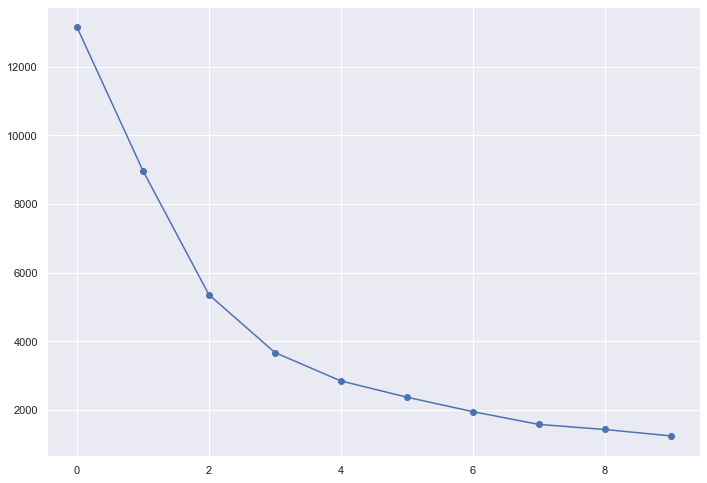

In [194]:
from sklearn.cluster import KMeans

inertia = []
for i in np.arange(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(st_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(inertia, marker="o");

In [206]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(st_scaled)
df_rfm["Clusters"] = (kmeans.labels_ +1)

KMeans(n_clusters=3)

In [207]:
df_rfm

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12346,68,15,-64.68,1
12347,4,2,1323.32,1
12348,75,1,222.16,1
12349,44,4,2646.99,1
12351,12,1,300.93,1
...,...,...,...,...
18283,19,6,641.77,1
18284,66,2,436.68,1
18285,297,1,427.00,2


In [212]:
df_rfm.groupby(["Clusters"])["Recency", "Frequency", "Monetary"].mean()

C:\Users\besir\AppData\Local\Temp\ipykernel_4536\414398233.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rfm.groupby(["Clusters"])["Recency", "Frequency", "Monetary"].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,42.460201,5.954559,1918.761949
2,244.379945,1.896964,405.763840
3,5.882353,117.647059,95030.755882


In [213]:
def func(row):
    if row["Clusters"] ==1:
        return "Avg.CX"
    if row["Clusters"] ==2:
        return "Whales"
    else:
        return "Lapsed.CX"

In [214]:
df_rfm["Conditions"] = df_rfm.apply(func, axis=1)

In [217]:
result = df_rfm["Conditions"].value_counts()

In [218]:
result

Avg.CX       3279
Whales       1087
Lapsed.CX      17
Name: Conditions, dtype: int64

<AxesSubplot:>

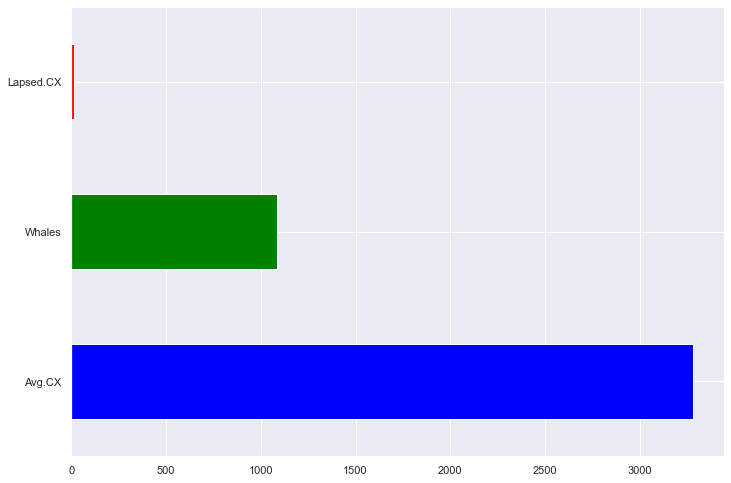

In [221]:
result.plot(kind="barh", color= ["blue", "green", "red"])

In [222]:
df_rfm[df_rfm["Conditions"] == "Whales"]

,Recency,Frequency,Monetary,Clusters,Conditions
Customer ID,,,,,
12355,204,1,488.21,2,Whales
12362,375,1,130.00,2,Whales
12366,270,1,500.24,2,Whales
12368,265,1,917.70,2,Whales
12370,261,3,774.62,2,Whales
...,...,...,...,...,...
18273,227,1,153.00,2,Whales
18275,215,2,741.85,2,Whales
18279,156,1,231.34,2,Whales


In [223]:
df_rfm[df_rfm["Conditions"] == "Avg.CX"]

,Recency,Frequency,Monetary,Clusters,Conditions
Customer ID,,,,,
12346,68,15,-64.68,1,Avg.CX
12347,4,2,1323.32,1,Avg.CX
12348,75,1,222.16,1,Avg.CX
12349,44,4,2646.99,1,Avg.CX
12351,12,1,300.93,1,Avg.CX
...,...,...,...,...,...
18280,17,2,291.85,1,Avg.CX
18283,19,6,641.77,1,Avg.CX
18284,66,2,436.68,1,Avg.CX


In [224]:
df_rfm[df_rfm["Conditions"] == "Lapsed.CX"]

,Recency,Frequency,Monetary,Clusters,Conditions
Customer ID,,,,,
12748,2,159,20898.03,3,Lapsed.CX
13089,5,132,55828.31,3,Lapsed.CX
13093,10,76,46332.26,3,Lapsed.CX
13694,10,105,128172.42,3,Lapsed.CX
14156,8,138,183180.55,3,Lapsed.CX
14527,2,108,18063.16,3,Lapsed.CX
14606,3,135,18380.53,3,Lapsed.CX
14646,11,87,243853.05,3,Lapsed.CX
14911,2,270,137675.91,3,Lapsed.CX
